In [1]:
from pySW4.plotting.hillshade import shade_and_color, shade_colorbar
from pySW4.utils.geo import read_GeoTIFF

import matplotlib.pyplot as plt
import numpy as np

/Users/shahar/tools/python-packages/pySW4/pySW4/utils/utils.py:28: UserWarning: OpenCV not found. Don't worry about this unless you want to use `pySW4.utils.resample` in `draft` mode.
  warn("OpenCV not found. Don't worry about this unless you want to use "


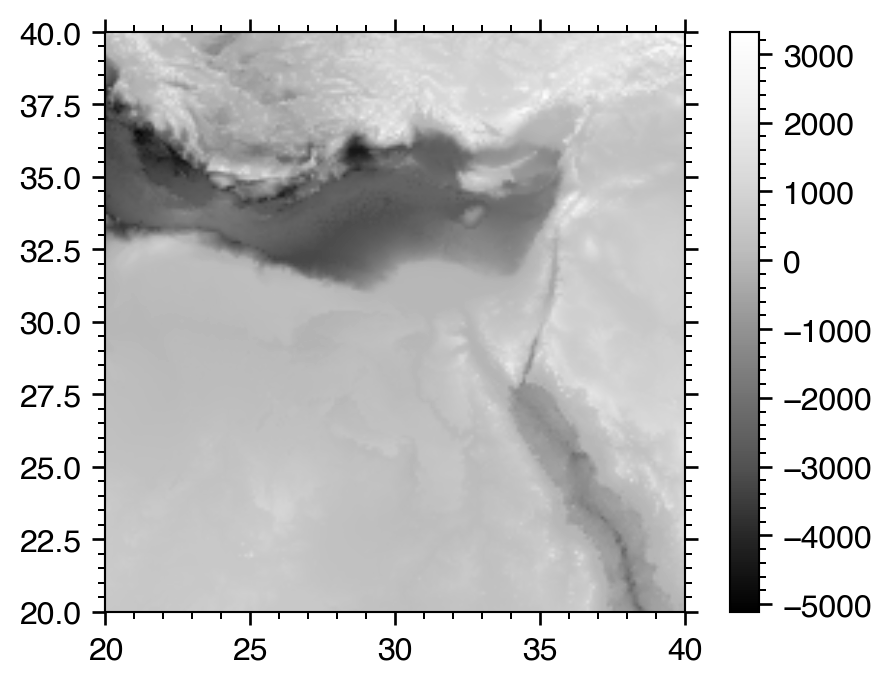

In [2]:
topo = read_GeoTIFF('/Users/shahar/data/GEBCO_2014_1D_GLOBAL.nc')

topo.set_new_extent(20, 40, 20, 40)
topo.resample(to=0.1)

plt.imshow(topo.z, 'Greys_r', extent=topo.extent, interpolation='bilinear')
plt.colorbar()

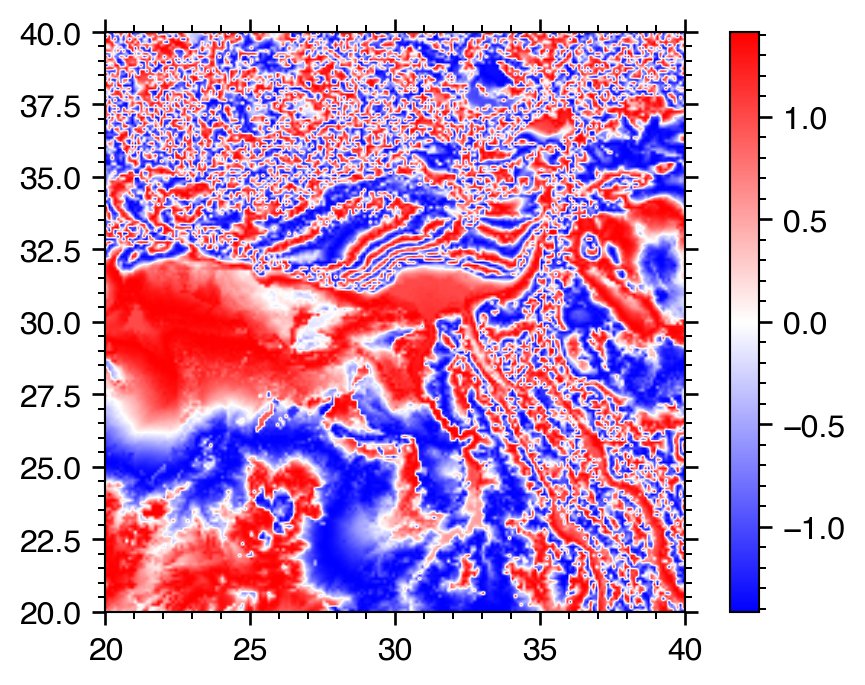

In [3]:
dummy_data = (
    np.cos(0.1 * 2 * np.pi * np.radians(topo.z)) +
    np.sin(0.1 * 2 * np.pi * np.radians(topo.z))
)

plt.imshow(dummy_data, 'bwr', extent=topo.extent, interpolation='bilinear')
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


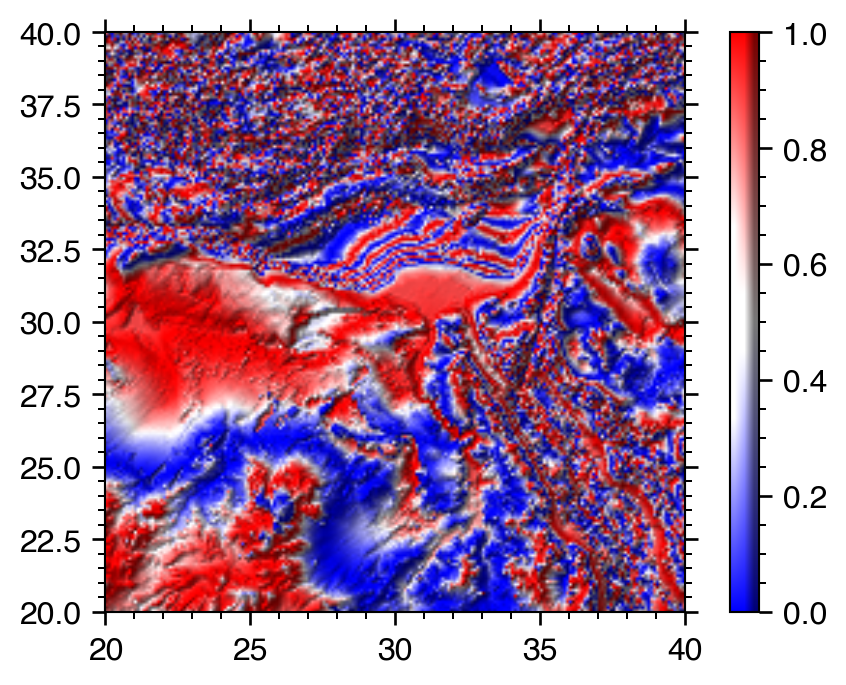

In [4]:
rgb, shading_dict = shade_and_color(
    topo.z, dummy_data, cmap='bwr', scale=0.1, contrast=0.5, brightness=1.5,
    return_shading_dict=True)

plt.imshow(rgb, 'bwr', extent=topo.extent, interpolation='bilinear')
cb = plt.colorbar()

shade_colorbar(cb, **shading_dict)